# Evaluation terminale : Machine learning & python -- LEBOUCHER Nolan

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Le machine learning est une intelligence artificielle qui apprend d'elle avec des données qui lui sont transmit

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

Le machine learning peut être utilisés pour découvrir des maladies, rechercher un objet via une photo ou autres... Par exemple Shazam qui permet de trouver une musique via le son.

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

- Supervisé = On définit les entrées et sorties souhaités
- Non supervisé = L'algorythme créer lui-même la façon dont l'entrée de la structure doit être

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?


- Classification = supervisé
- Clustering = non supervisé

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Un arbre de décision est une methode pour dire "oui" ou "non" par rapport à la question : (ex: n < n+1 === oui).

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

C'est lorsque que l'algo réagit trop aux variations dans les données d'entrainement

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [94]:
import pandas as pd
#...
from pandas_profiling import ProfileReport



Importez les données comme suit :

In [95]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [96]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

Nous pouvons supprimé les colonnes "OREB" et "DREB" car il y as mes valeurs additionnées des deux dans la colone REB

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [97]:
data = data.drop(columns=["Name", "3P%", "FTM", "FTA", "OREB", "DREB"])
    
data

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,FT%,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,69.9,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,76.5,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,67.0,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,68.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,67.4,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,79.2,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,79.4,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,64.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,62.5,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

non après le trie des données

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Cela permet d'entrainer l'algo sur 75% des données et de la tester sur les 25% restant.

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [99]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

estimate = clf.predict(X_test)

print((y_test - estimate).std())

0.6060735569893996


#### Exercice 2.5: Evaluez la qualité du modèle. 

In [100]:
accuracy_score(y_test, estimate, normalize=True, sample_weight=None)

0.6336336336336337

#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

J'utilise la metrique accuracy_score car je trouve que c'est la simple

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

Non la qualité n'est pas satisfaisante parce que

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

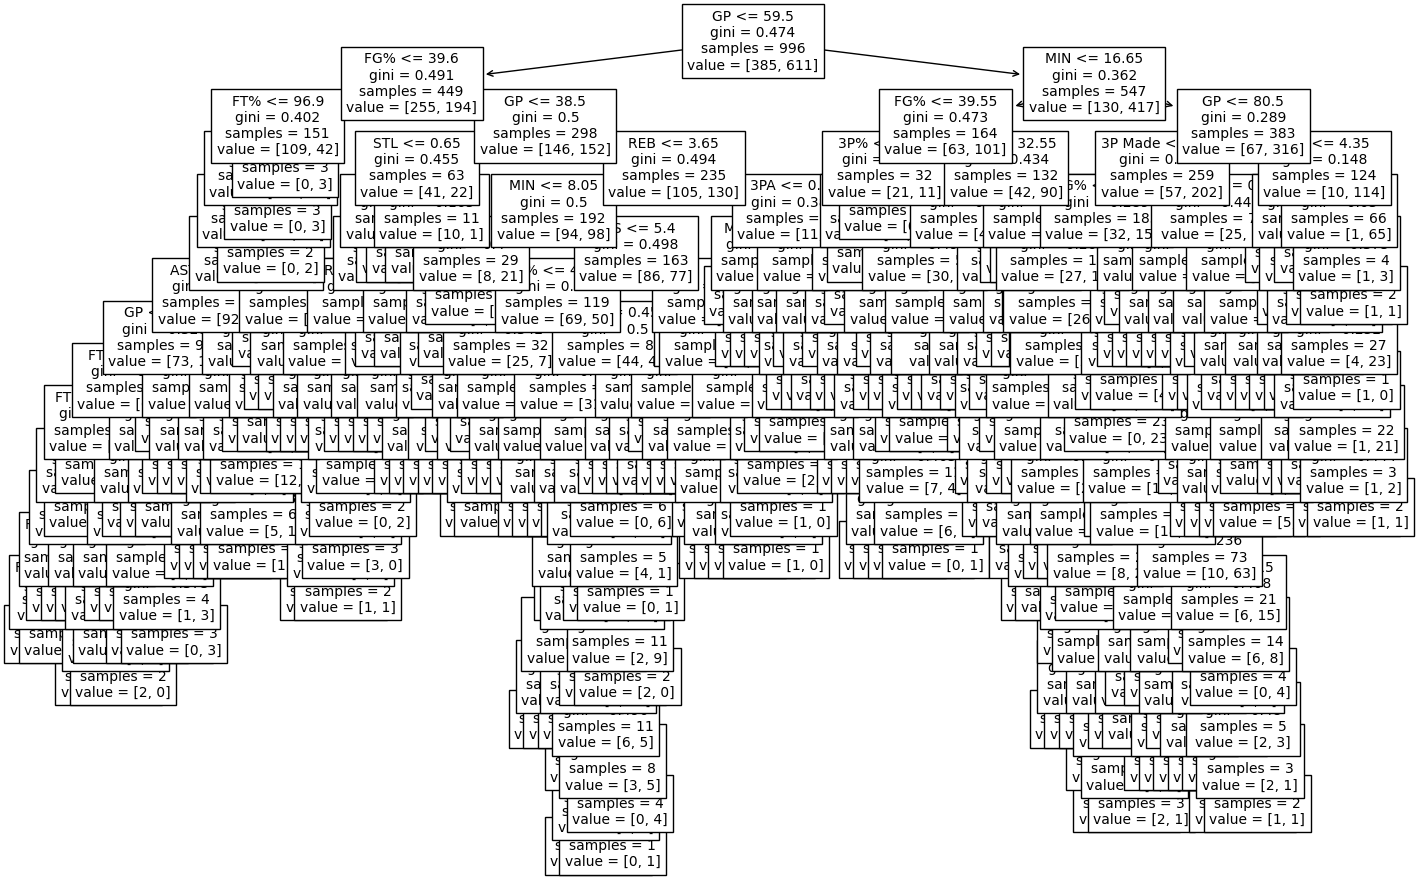

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

Si GP <= 59.5 alors FG% <= 39.6

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

- Nous pouvons préciser les paramètres
- Utiliser des données et des caractéristiques significatives
- Faire des test avec des joueurs qui donnés d'il y a 5 ans pour verifier la methode par rapport au joueur restant aujourd'hui

###### Exercice 2.7: Essayer d'appliquer une de ces méthodes

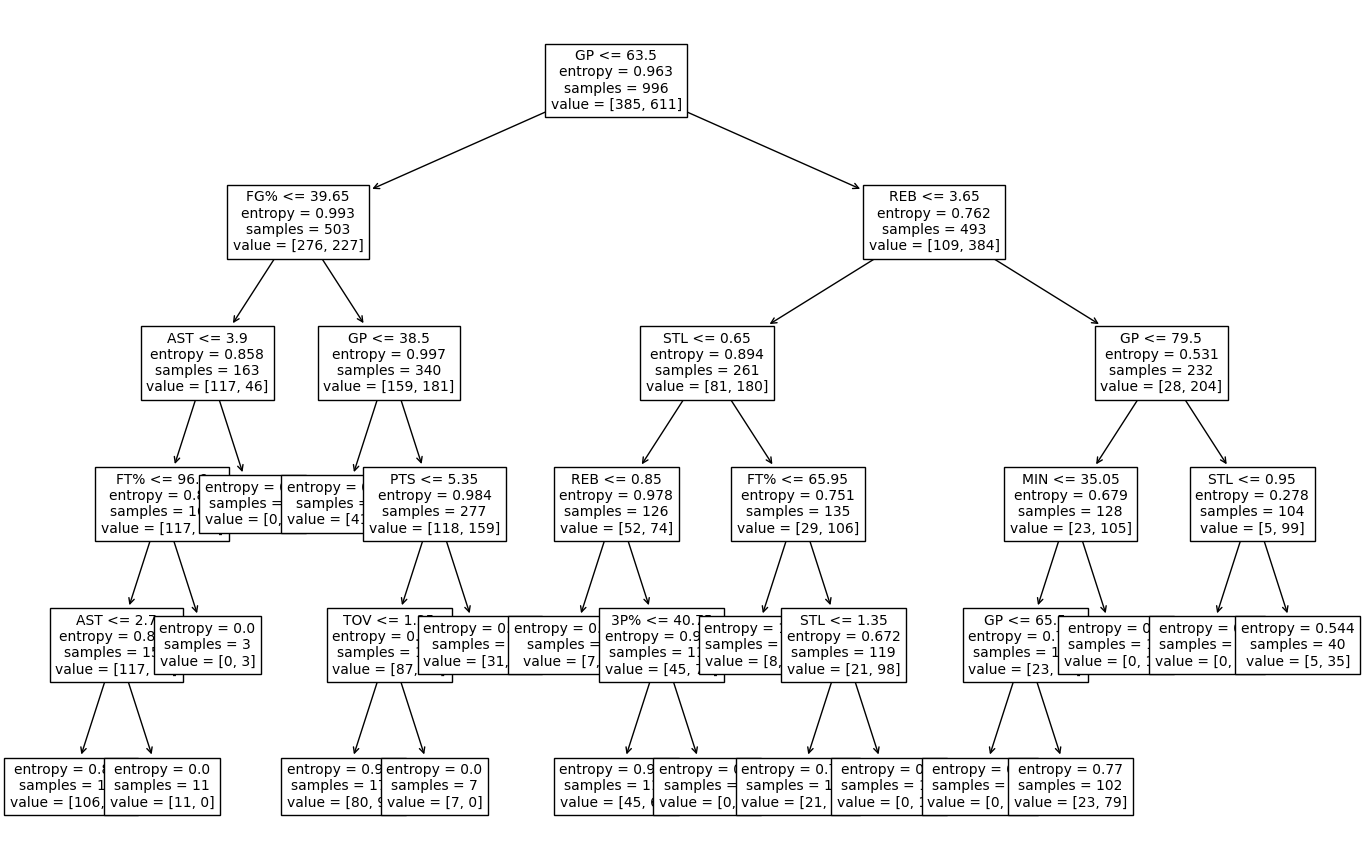

In [102]:
plt.figure(figsize=(17,11))
plot_tree(clf_b, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.8: Concluez

En conclusion, 1 personne sur 2 fera plus de 5 ans au sein de la ligue NBA